<a href="https://colab.research.google.com/github/arturossouza/colab-test/blob/main/M%C3%A9todos_Matem%C3%A1ticos_Trabalho_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Data from Google Drive

In [1]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet_c1 = gc.open('transmiss_covid_clima_C1').sheet1
worksheet_c4 = gc.open('transmiss_covid_clima_C4').sheet1

# get_all_values gives a list of rows.
rows_c1 = worksheet_c1.get_all_values()
rows_c4 = worksheet_c4.get_all_values()

# Convert to a DataFrame and render.
import pandas as pd
c1_data_df = pd.DataFrame.from_records(rows_c1,columns=rows_c1[0])
c4_data_df = pd.DataFrame.from_records(rows_c4,columns=rows_c4[0])

# Cleaning Dataset

In [2]:
def adjusting_dataframe (df):
  df = df.iloc[1: , :]

  for column in df.columns:
    if column == "DATA":
      df[column] = df[column].str.replace('.', '')
    else:  
      df[column] = pd.to_numeric(df[column].str.replace(',', '.'))

  return df


In [3]:
c1_clean_df = adjusting_dataframe(c1_data_df)

c1_clean_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,DATA,Média de Temp. [Hora] (C),Média de Umi. (%),Média de Pressao (hPa),Média de Nebulosidade (Decimos),Média de Insolacao (h),Média de Chuva [Diaria] (mm),Média de Vel. Vento (m/s),Taxa_casos_covid_C1
1,01/jan,24.00,94.00,987.90,10.00,NaN,39.4,1.00,NaN
2,02/jan,27.70,82.50,987.85,9.50,4.2,0.4,1.00,NaN
3,03/jan,25.53,88.67,989.43,9.67,2.0,10.0,1.33,NaN
4,04/jan,25.30,86.00,990.00,10.00,NaN,16.7,1.00,NaN
5,05/jan,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [4]:
c1_clean_df.dtypes

DATA                                object
Média de Temp. [Hora] (C)          float64
Média de Umi. (%)                  float64
Média de Pressao (hPa)             float64
Média de Nebulosidade (Decimos)    float64
Média de Insolacao (h)             float64
Média de Chuva [Diaria] (mm)       float64
Média de Vel. Vento (m/s)          float64
Taxa_casos_covid_C1                float64
dtype: object

In [5]:
c4_clean_df = adjusting_dataframe(c4_data_df)

c4_clean_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,DATA,Média de Temp. [Hora] (C),Média de Umi. (%),Média de Pressao (hPa),Média de Nebulosidade (Decimos),Média de Insolacao (h),Média de Chuva [Diaria] (mm),Média de Vel. Vento (m/s),Taxa_casos_covid_C4
1,01/jan,27.90,83.00,1009.50,6.9,NaN,8.6,1.00,NaN
2,02/jan,28.07,81.67,1009.60,7.5,3.3,32.7,1.00,NaN
3,03/jan,26.40,88.67,1011.37,7.5,0.0,2.6,1.00,NaN
4,04/jan,28.47,81.00,1011.37,7.1,6.9,4.8,0.67,NaN
5,05/jan,26.00,91.00,1012.05,7.5,3.7,4.8,1.00,NaN


In [6]:
c4_clean_df.dtypes

DATA                                object
Média de Temp. [Hora] (C)          float64
Média de Umi. (%)                  float64
Média de Pressao (hPa)             float64
Média de Nebulosidade (Decimos)    float64
Média de Insolacao (h)             float64
Média de Chuva [Diaria] (mm)       float64
Média de Vel. Vento (m/s)          float64
Taxa_casos_covid_C4                float64
dtype: object

# Looking for Correlations

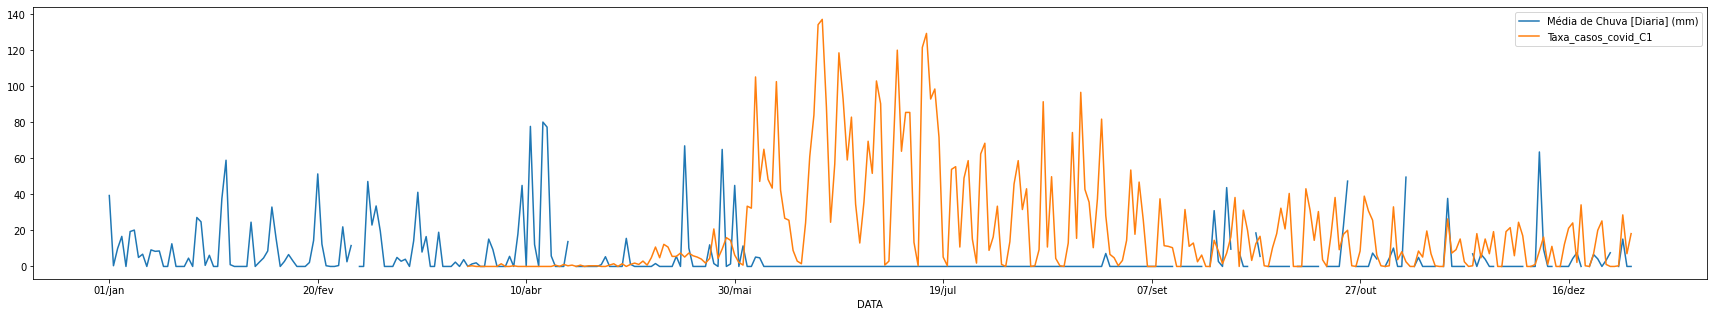

In [7]:
c1_clean_df.plot(kind="line", figsize=(30, 5), x="DATA", y=["Média de Chuva [Diaria] (mm)","Taxa_casos_covid_C1"])

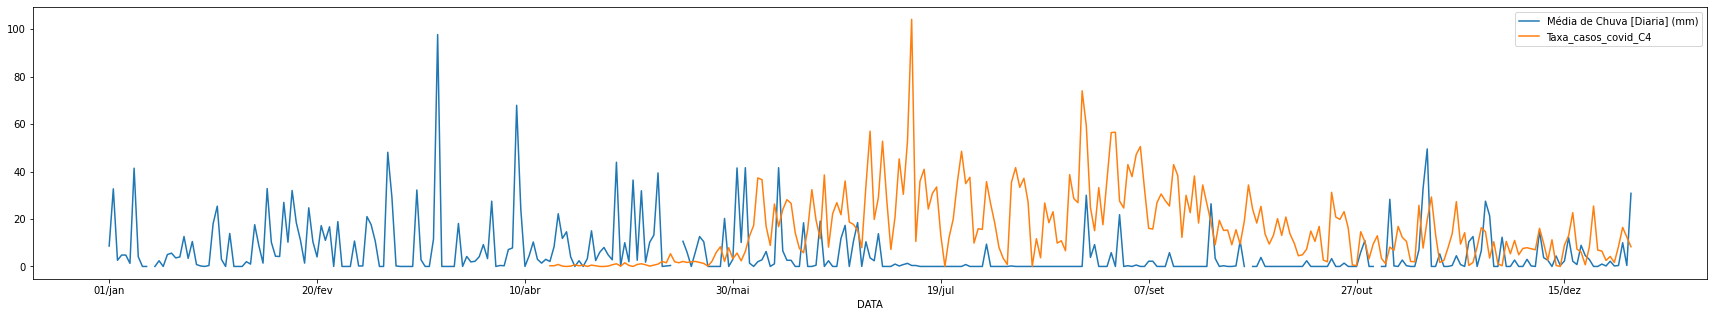

In [8]:
c4_clean_df.plot(kind="line", figsize=(30, 5), x="DATA", y=["Média de Chuva [Diaria] (mm)","Taxa_casos_covid_C4"])

In [9]:
import seaborn as sn

import matplotlib.pyplot as plt

In [10]:
def plot_df_correlation(df1, df2, correlation_type):

  df1_corr = df1.corr(method=correlation_type)
  df2_corr = df2.corr(method=correlation_type)

  plt.rcParams.update({'font.size': 22})

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(50,20))  
  fig.suptitle(f"{correlation_type} correlation")

  sn.heatmap(df1_corr, annot=True, ax=ax1)
  sn.heatmap(df2_corr, annot=True, ax=ax2)


Here we are looking for correlation from the first record of covid taxes untill the end of the year.

In [61]:
index_first_day_of_cases = c1_clean_df[c1_clean_df["Taxa_casos_covid_C1"] > 0]["DATA"].index.min()

c1_to_corr_df = c1_clean_df[c1_clean_df.index >= index_first_day_of_cases]

In [62]:
index_first_day_of_cases = c4_clean_df[c4_clean_df["Taxa_casos_covid_C4"] > 0]["DATA"].index.min()

c4_to_corr_df = c4_clean_df[c4_clean_df.index >= index_first_day_of_cases]

## Pearson Correlation

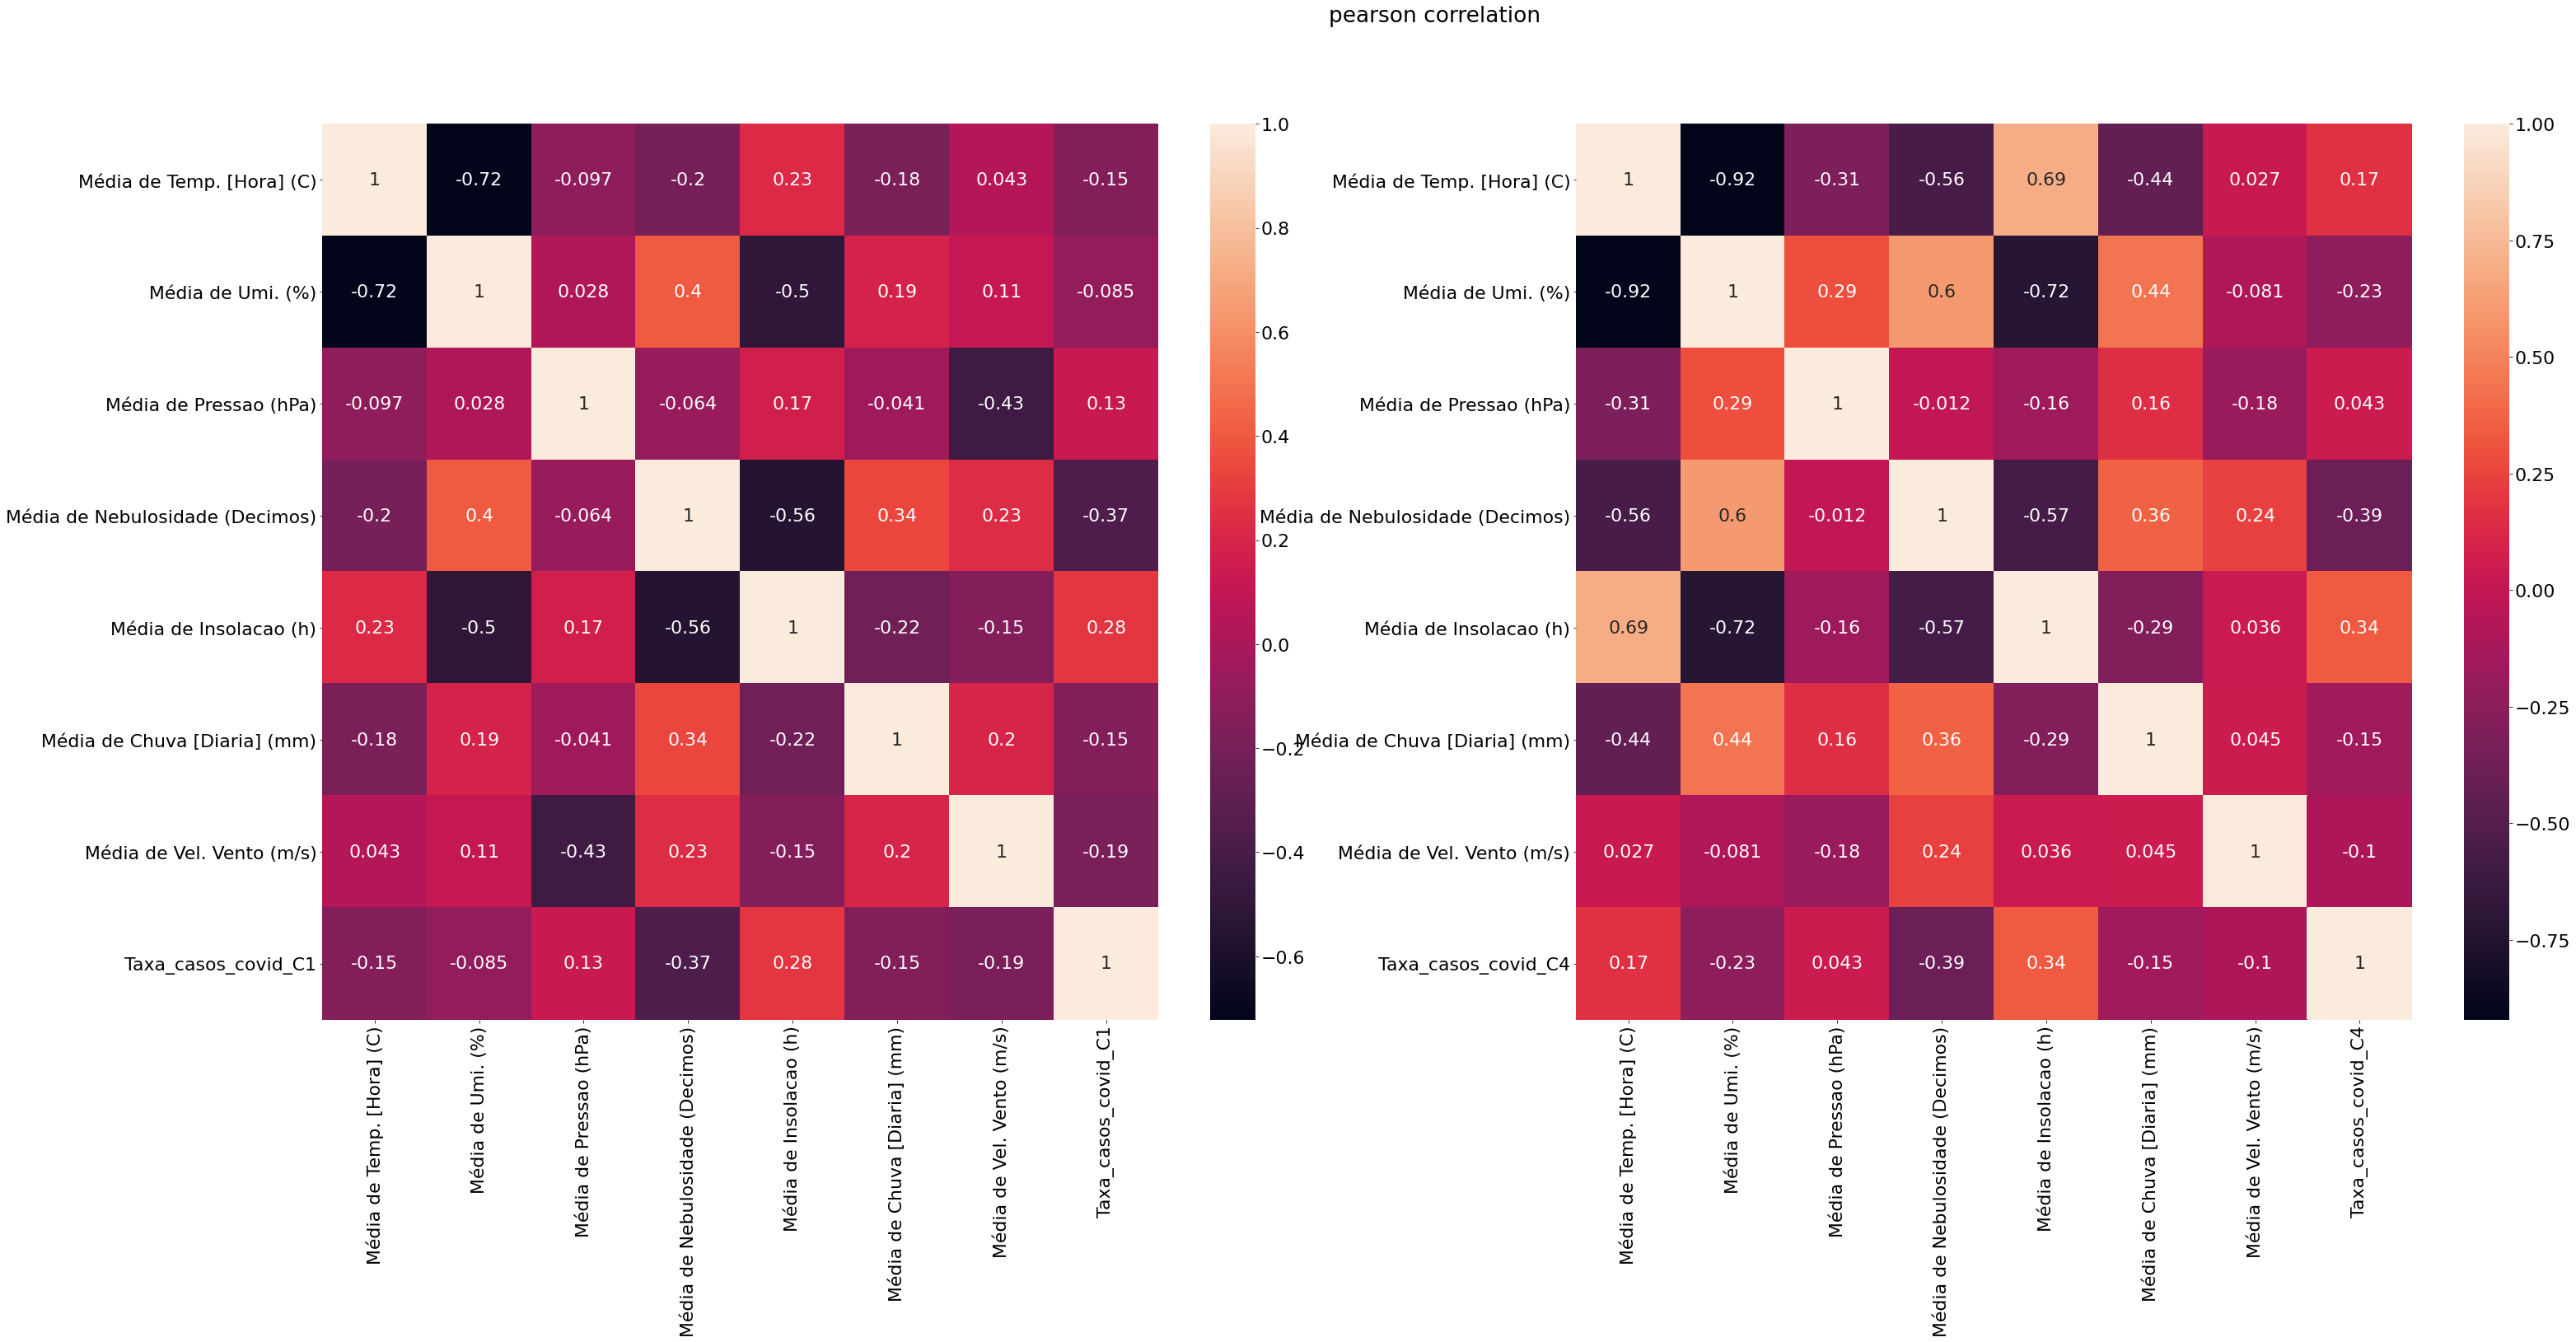

In [63]:
plot_df_correlation(c1_to_corr_df, c4_to_corr_df, "pearson")

## Kendall Correlation

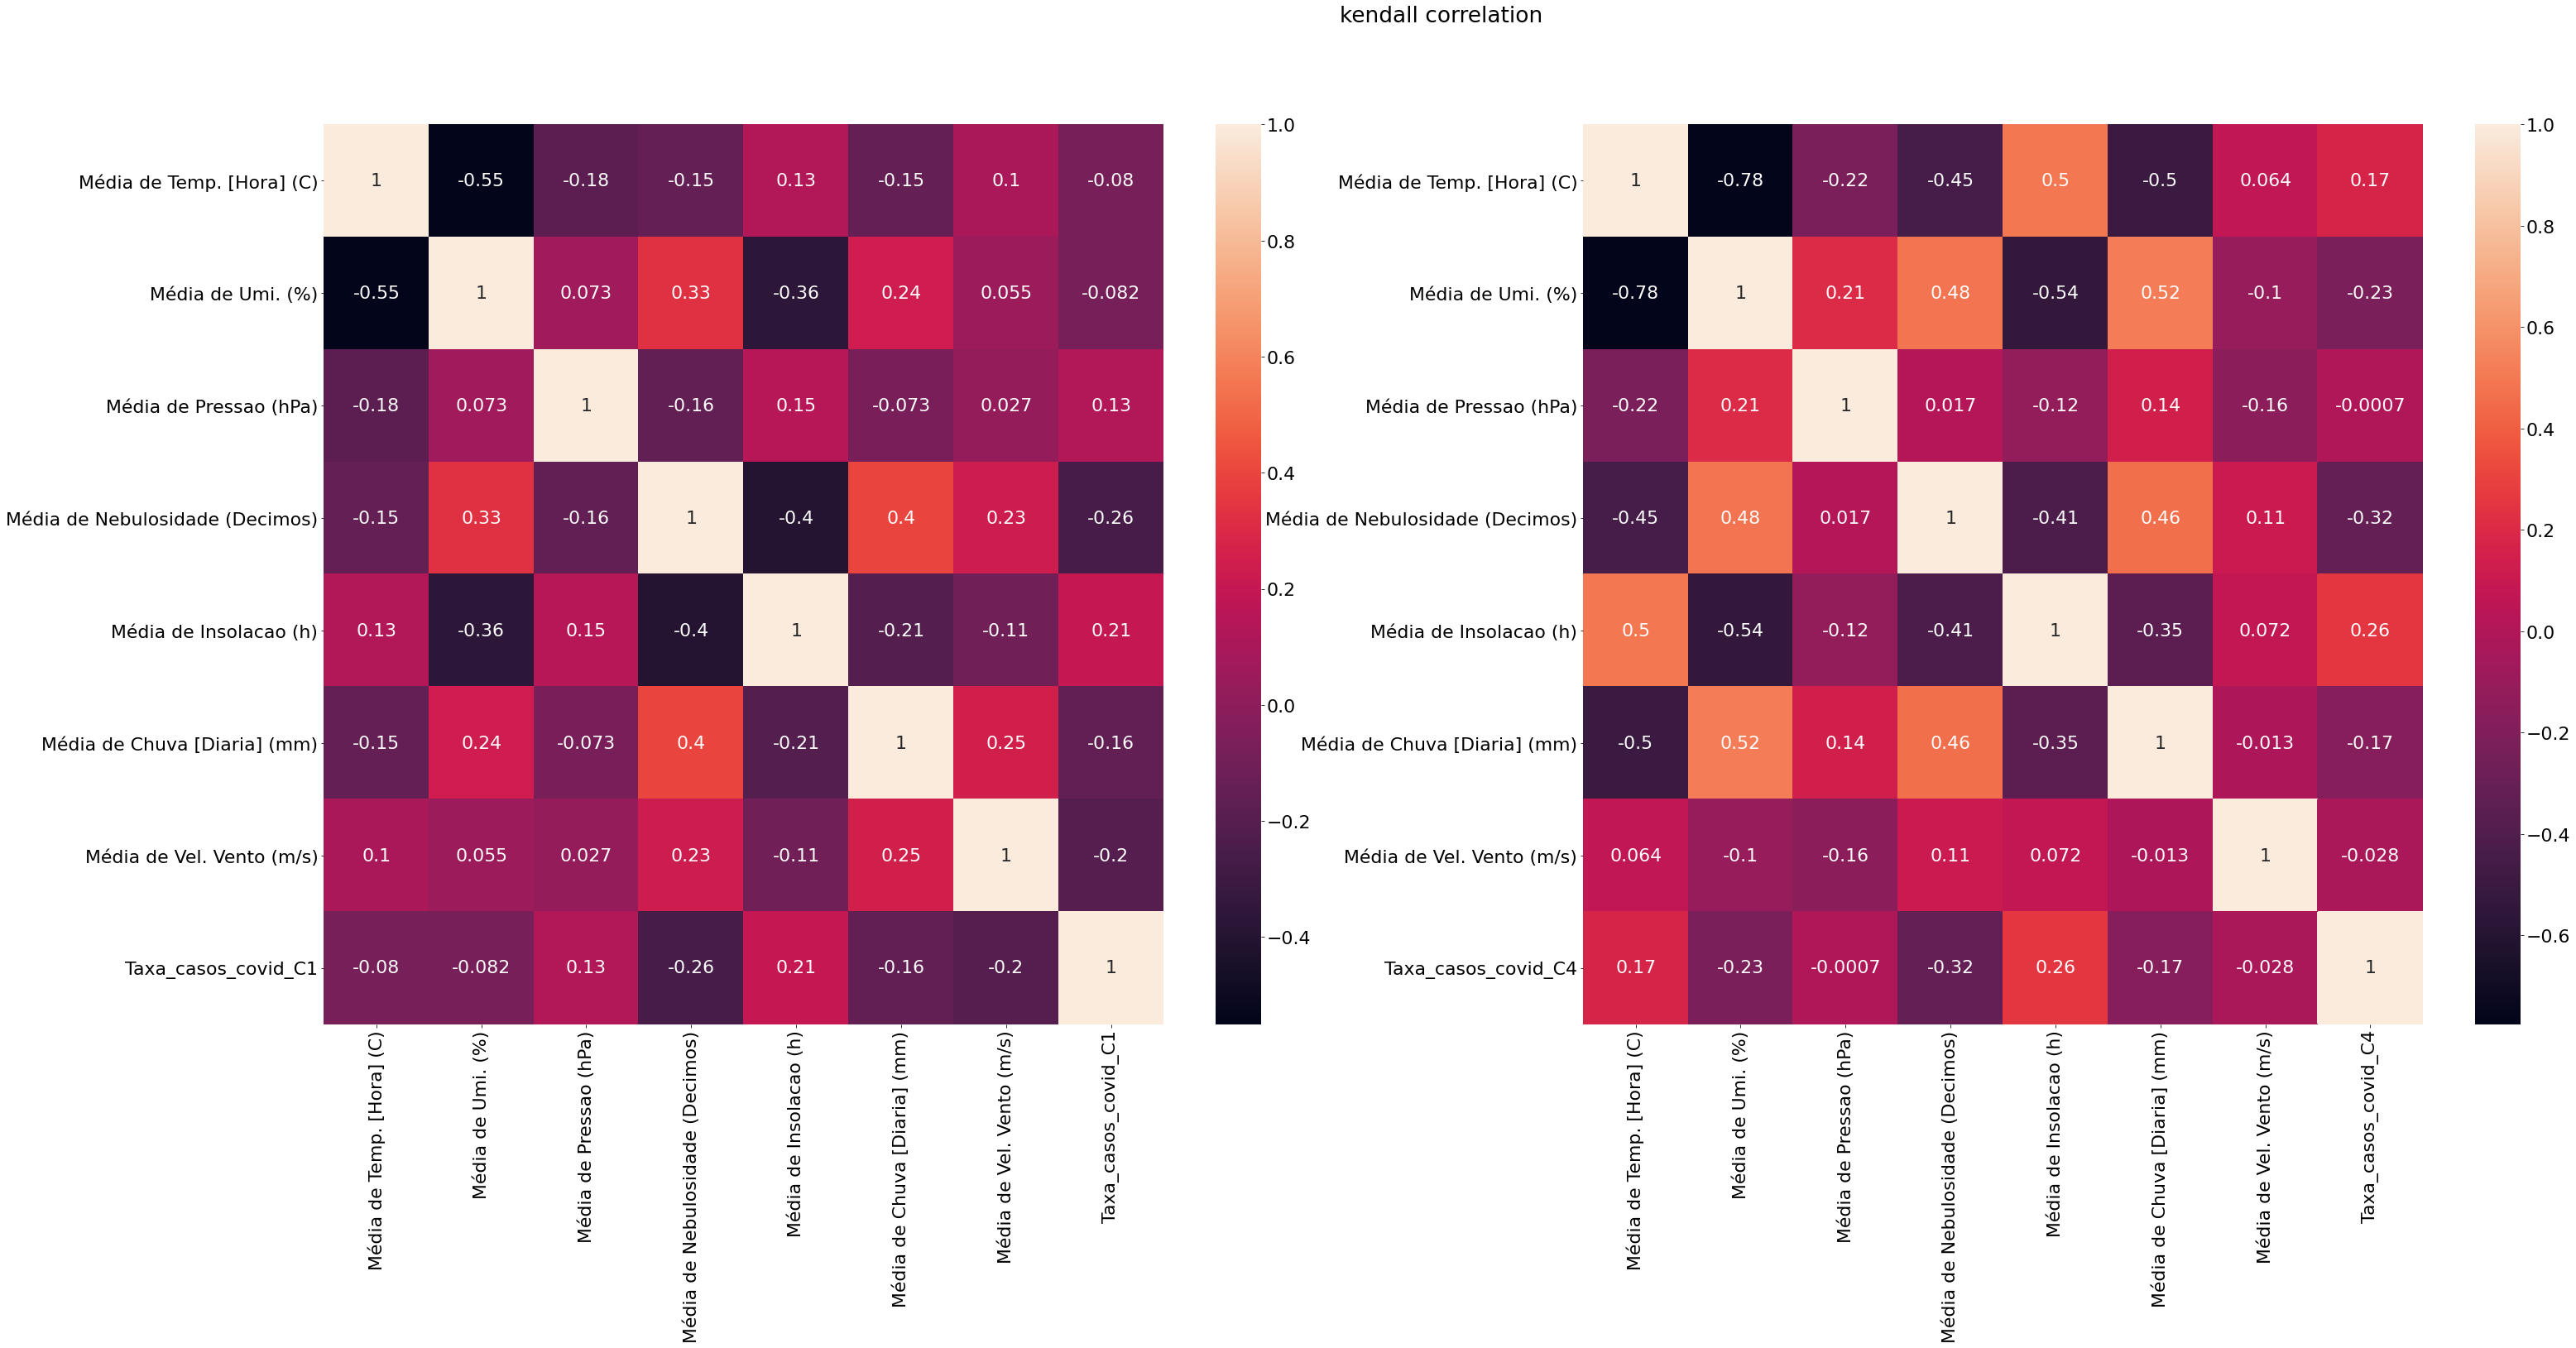

In [64]:
plot_df_correlation(c1_to_corr_df, c4_to_corr_df, "kendall")

## Spearman Correlation

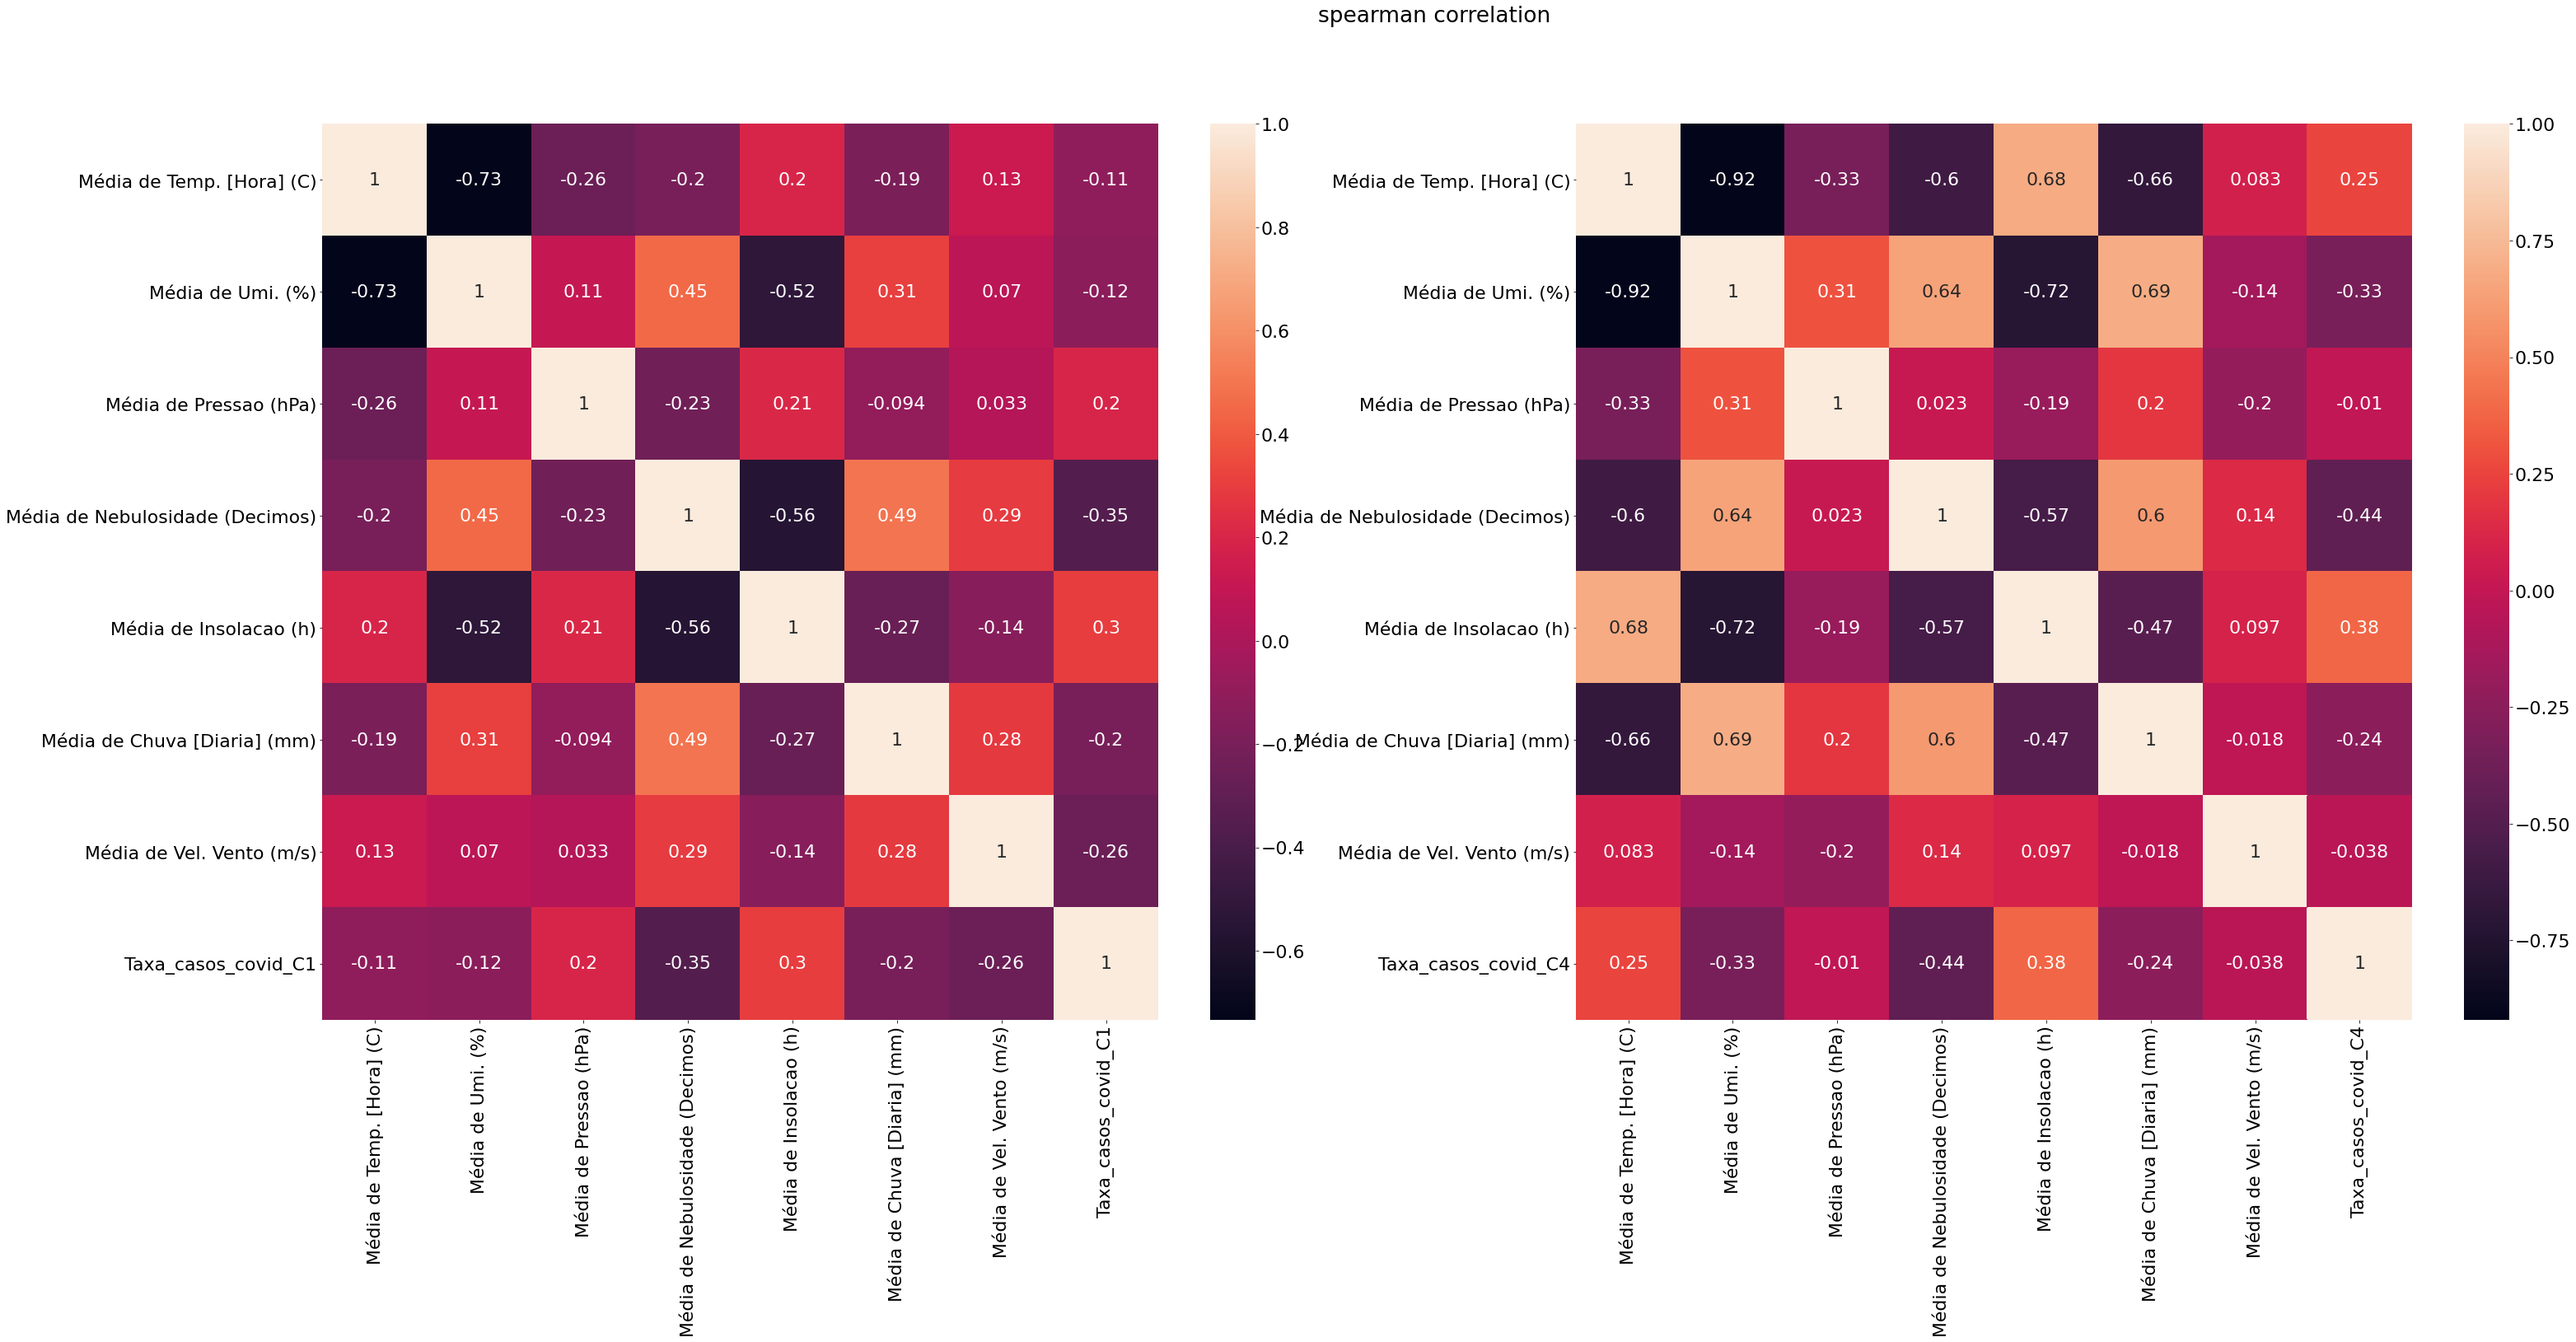

In [65]:
plot_df_correlation(c1_to_corr_df, c4_to_corr_df, "spearman")

# Looking for Correlations between the two clusters

In [73]:
def renaming_columns(df, label):

  changes = {}
  for column in df.columns:
    if (column != "DATA" and column != "Taxa_casos_covid_C1" and column != "Taxa_casos_covid_C4"):
      changes[column] = column + label

  renamed_df = df.rename(columns = changes)

  return renamed_df

In [74]:
label_c1_df = renaming_columns(c1_clean_df, "_C1")

In [76]:
label_c1_df.columns

Index(['DATA', 'Média de Temp. [Hora] (C)_C1', 'Média de Umi. (%)_C1',
       'Média de Pressao (hPa)_C1', 'Média de Nebulosidade (Decimos)_C1',
       'Média de Insolacao (h)_C1', 'Média de Chuva [Diaria] (mm)_C1',
       'Média de Vel. Vento (m/s)_C1', 'Taxa_casos_covid_C1'],
      dtype='object')

In [66]:
c1_clean_df.columns

Index(['DATA', 'Média de Temp. [Hora] (C)', 'Média de Umi. (%)',
       'Média de Pressao (hPa)', 'Média de Nebulosidade (Decimos)',
       'Média de Insolacao (h)', 'Média de Chuva [Diaria] (mm)',
       'Média de Vel. Vento (m/s)', 'Taxa_casos_covid_C1'],
      dtype='object')

In [77]:
label_c4_df = renaming_columns(c4_clean_df, "_C4")

In [78]:
label_c4_df.columns

Index(['DATA', 'Média de Temp. [Hora] (C)_C4', 'Média de Umi. (%)_C4',
       'Média de Pressao (hPa)_C4', 'Média de Nebulosidade (Decimos)_C4',
       'Média de Insolacao (h)_C4', 'Média de Chuva [Diaria] (mm)_C4',
       'Média de Vel. Vento (m/s)_C4', 'Taxa_casos_covid_C4'],
      dtype='object')

In [79]:
c4_clean_df.columns

Index(['DATA', 'Média de Temp. [Hora] (C)', 'Média de Umi. (%)',
       'Média de Pressao (hPa)', 'Média de Nebulosidade (Decimos)',
       'Média de Insolacao (h)', 'Média de Chuva [Diaria] (mm)',
       'Média de Vel. Vento (m/s)', 'Taxa_casos_covid_C4'],
      dtype='object')

In [80]:
index_first_day_of_cases = label_c1_df[label_c1_df["Taxa_casos_covid_C1"] > 0]["DATA"].index.min()

c1_label_to_join_df = label_c1_df[label_c1_df.index >= index_first_day_of_cases]

c1_label_to_join_df.head()

,DATA,Média de Temp. [Hora] (C)_C1,Média de Umi. (%)_C1,Média de Pressao (hPa)_C1,Média de Nebulosidade (Decimos)_C1,Média de Insolacao (h)_C1,Média de Chuva [Diaria] (mm)_C1,Média de Vel. Vento (m/s)_C1,Taxa_casos_covid_C1
87,27/mar,27.77,84.67,986.10,5.00,7.0,0.0,1.37,0.09
88,28/mar,28.27,78.67,987.47,8.77,7.0,1.4,1.37,0.37
89,29/mar,26.00,83.00,988.50,6.30,NaN,2.0,1.00,0.00
90,30/mar,31.00,72.00,986.45,5.65,8.8,0.0,1.55,0.00
91,31/mar,29.27,77.67,986.15,7.53,2.5,0.0,1.00,0.00


In [82]:
index_first_day_of_cases = label_c4_df[label_c4_df["Taxa_casos_covid_C4"] > 0]["DATA"].index.min()

c4_label_to_join_df = label_c4_df[label_c4_df.index >= index_first_day_of_cases]

c1_label_to_join_df.head()

,DATA,Média de Temp. [Hora] (C)_C1,Média de Umi. (%)_C1,Média de Pressao (hPa)_C1,Média de Nebulosidade (Decimos)_C1,Média de Insolacao (h)_C1,Média de Chuva [Diaria] (mm)_C1,Média de Vel. Vento (m/s)_C1,Taxa_casos_covid_C1
87,27/mar,27.77,84.67,986.10,5.00,7.0,0.0,1.37,0.09
88,28/mar,28.27,78.67,987.47,8.77,7.0,1.4,1.37,0.37
89,29/mar,26.00,83.00,988.50,6.30,NaN,2.0,1.00,0.00
90,30/mar,31.00,72.00,986.45,5.65,8.8,0.0,1.55,0.00
91,31/mar,29.27,77.67,986.15,7.53,2.5,0.0,1.00,0.00


In [96]:
c1_label_to_join_df.set_index("DATA", inplace=True)

In [97]:
c4_label_to_join_df.set_index("DATA", inplace=True)

In [100]:
super_table_df = pd.concat([c1_label_to_join_df, c4_label_to_join_df], axis=1, keys="DATA")

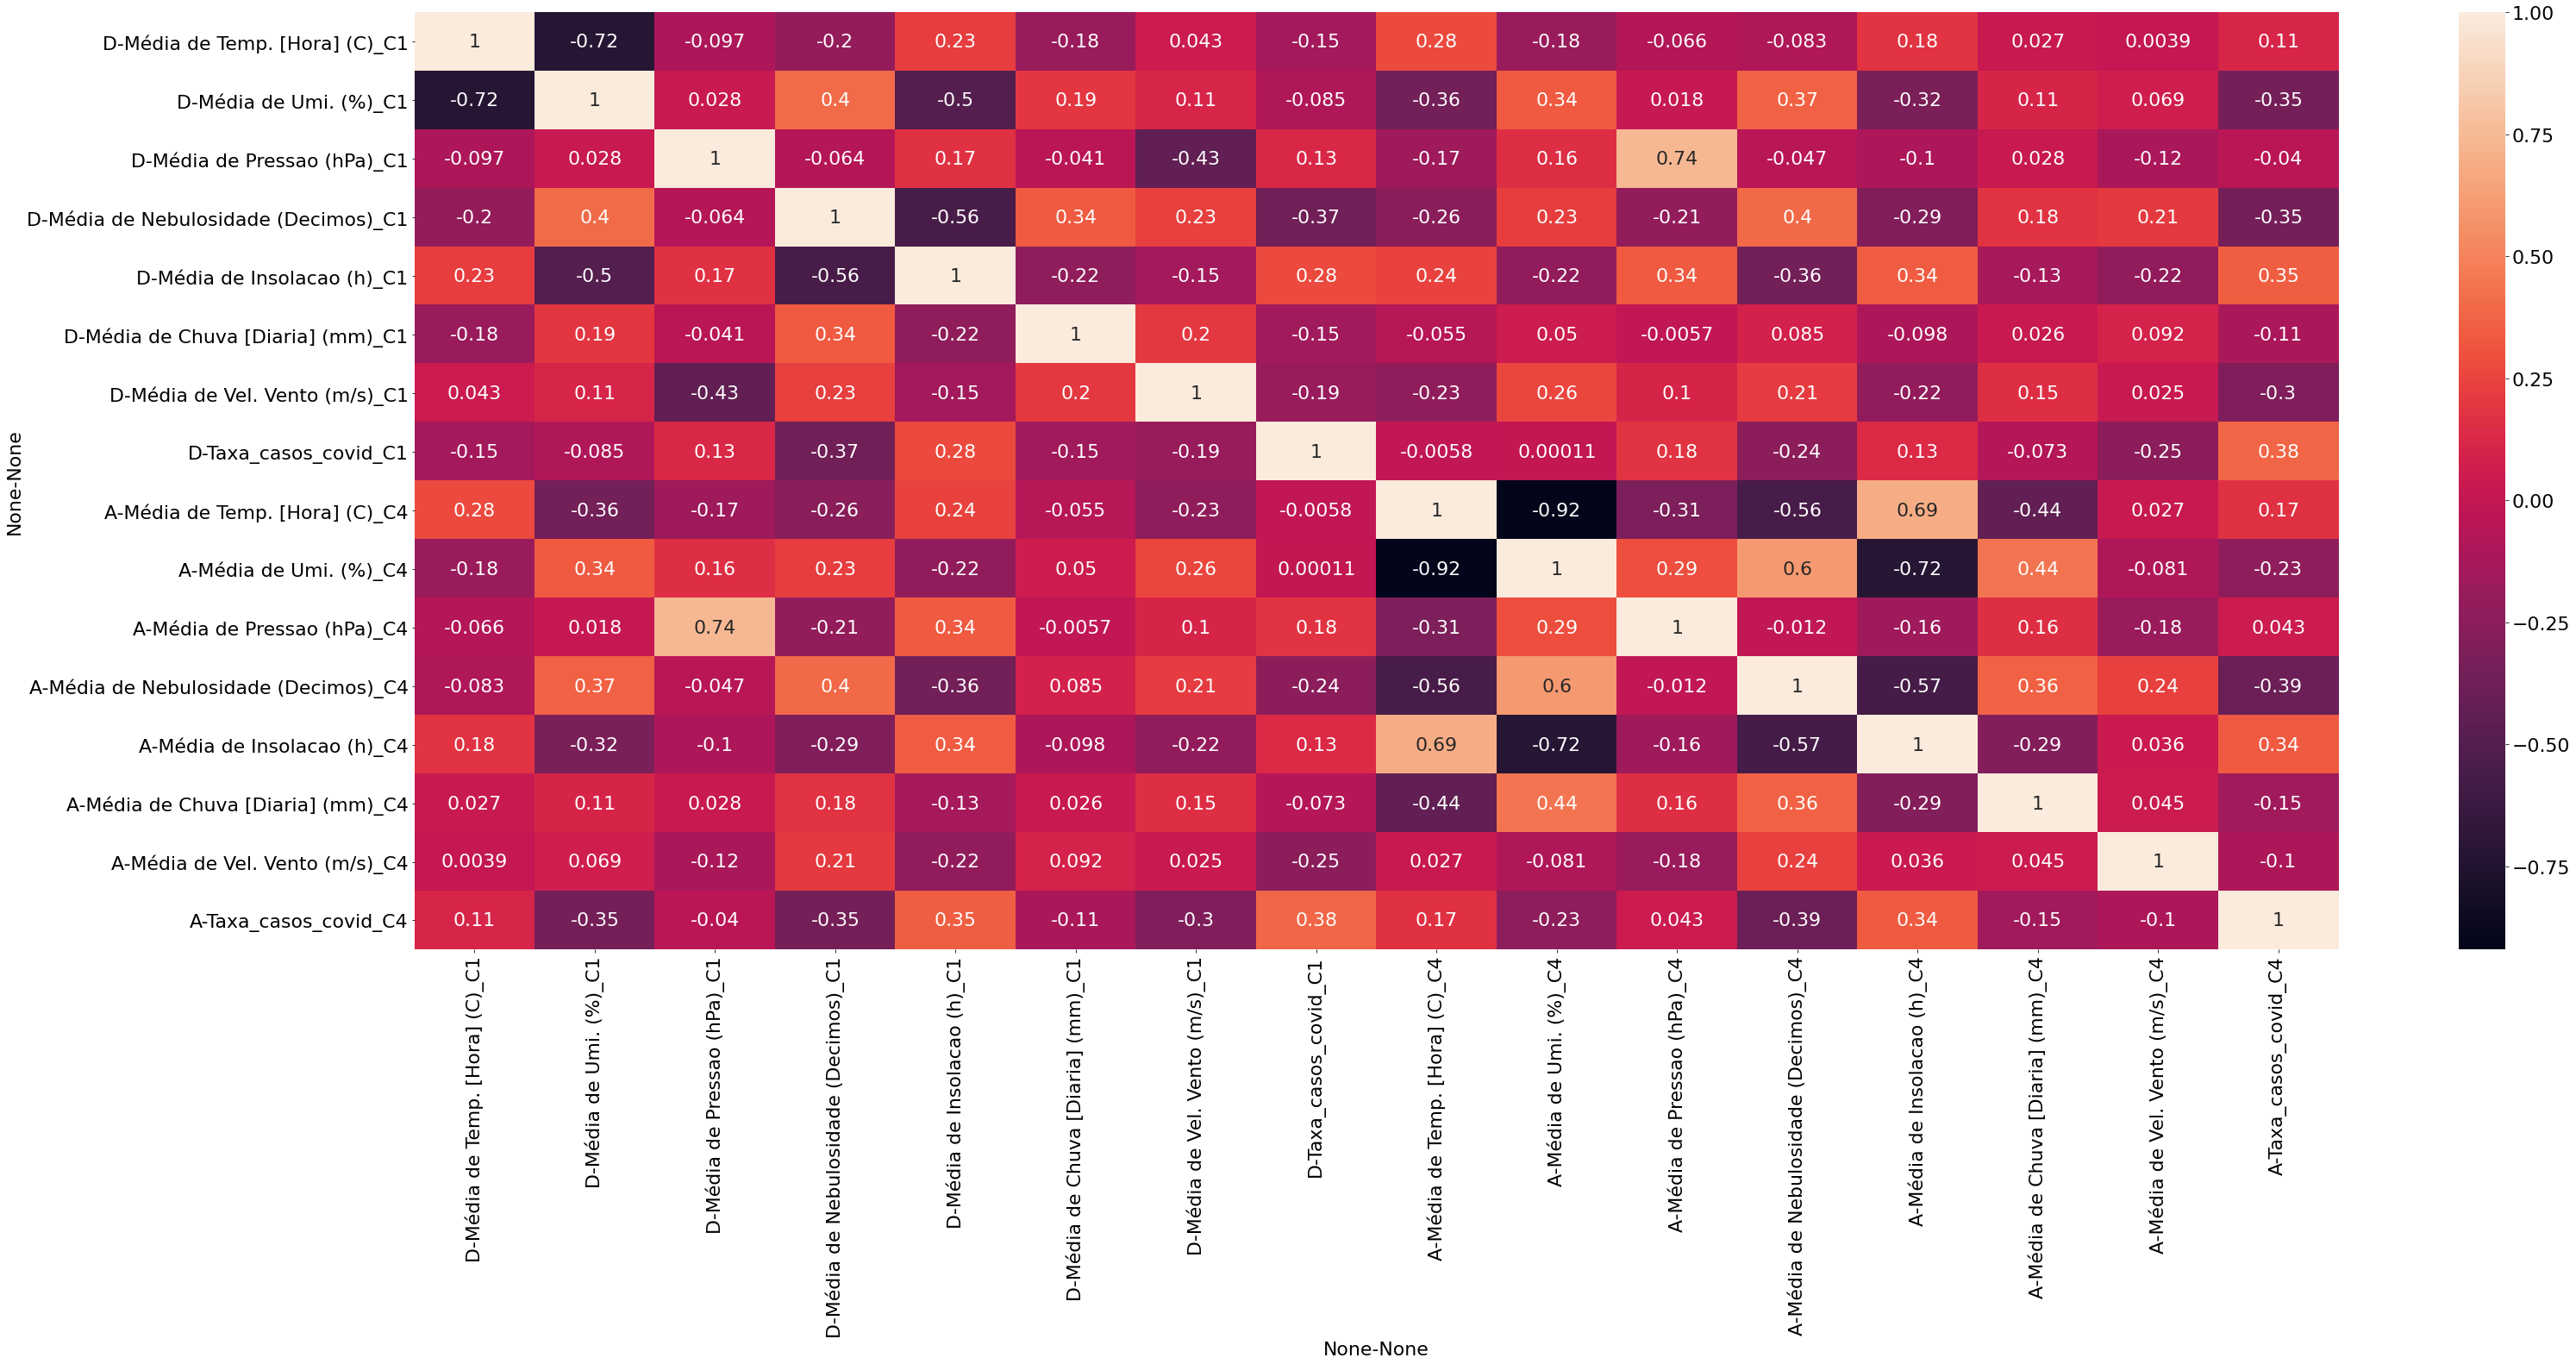

In [101]:
table_corr_df = super_table_df.corr(method="pearson") 

plt.rcParams.update({'font.size': 22})

fig, ax1 = plt.subplots(figsize=(50,20)) 

sn.heatmap(table_corr_df, annot=True, ax=ax1)

PS.: I just notice that this analysis doesn`t make sense because C! and C2 are different regions. There is no way that climatic features of one cluster affect the other.